# Grover’s Algorithm for Closest-Value Search in Quantum Simulators

## 4 qubits

### $\delta = 1$

In [46]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

def create_oracle(target, n, delta):
    # 创建一个空的量子电路
    oracle_qc = QuantumCircuit(n)
    
    # 标记在目标值和差值范围内的所有值
    for d in range(-delta, delta + 1):
        value = (target + d) % (2**n)
        value_bin = format(value, '0' + str(n) + 'b')
        for qubit, bit in enumerate(reversed(value_bin)):  # 反转二进制字符串以匹配Qiskit的顺序
            if bit == '0':
                oracle_qc.x(qubit)
        oracle_qc.h(n-1)
        oracle_qc.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
        oracle_qc.h(n-1)
        for qubit, bit in enumerate(reversed(value_bin)):
            if bit == '0':
                oracle_qc.x(qubit)
    
    # 将电路转换为门
    oracle_qc.draw(fold = -1)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate
    # return oracle_qc
    
def create_oracle2(target, n, delta):
    # 创建一个空的量子电路
    oracle_qc = QuantumCircuit(n)
    
    # 标记在目标值和差值范围内的所有值
    for d in range(-delta, delta + 1):
        value = (target + d) % (2**n)
        value_bin = format(value, '0' + str(n) + 'b')
        for qubit, bit in enumerate(reversed(value_bin)):  # 反转二进制字符串以匹配Qiskit的顺序
            if bit == '0':
                oracle_qc.x(qubit)
        oracle_qc.h(n-1)
        oracle_qc.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
        oracle_qc.h(n-1)
        for qubit, bit in enumerate(reversed(value_bin)):
            if bit == '0':
                oracle_qc.x(qubit)
    

    return oracle_qc
    
def grover_iteration(circuit, oracle, n):
    circuit.append(oracle, range(n))
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))
    return circuit

# 设置量子位数量和目标值
n = 4  # 量子位数量增加到4
target = 5  # 目标值（二进制为'0101'）
delta = 1  # 差值范围

# 初始化量子电路
qc = QuantumCircuit(n, n)

# 创建均匀叠加状态
qc.h(range(n))

# 创建oracle
oracle = create_oracle(target, n, delta)

oracle_circuit = create_oracle2(target, n, delta)
oracle_circuit.draw(fold=-1)

┌───┐          ┌───┐                    ┌───┐                    ┌───┐     
q_0: ┤ X ├───────■──┤ X ├─────────────────■──┤ X ├─────────────────■──┤ X ├─────
     ├───┤       │  ├───┤┌───┐            │  ├───┤                 │  └───┘     
q_1: ┤ X ├───────■──┤ X ├┤ X ├────────────■──┤ X ├─────────────────■────────────
     └───┘       │  └───┘└───┘            │  └───┘                 │            
q_2: ────────────■────────────────────────■────────────────────────■────────────
     ┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐
q_3: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [47]:
# 执行Grover迭代
qc = grover_iteration(qc, oracle, n)

# 测量所有量子位
qc.measure(range(n), range(n))

qc.draw()

┌───┐┌─────────┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├┤0        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤1        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤│  Oracle │├───┤├───┤       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤2        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤│         │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3        ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════╩══╩══╩══╩═
                                                         0  1  2  3

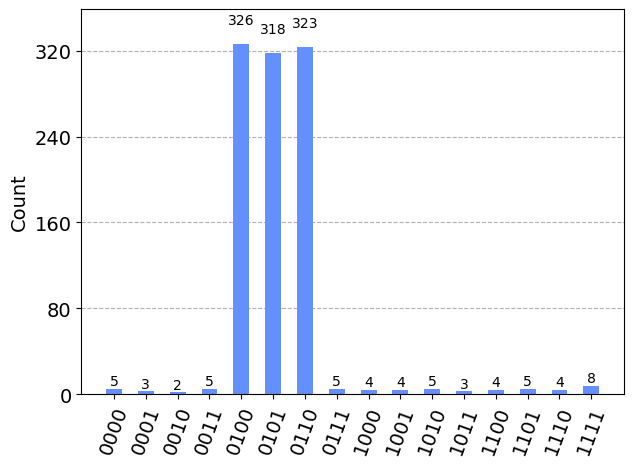

In [48]:
# 执行量子电路
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)

# 绘制直方图
plot_histogram(counts)


### $\delta = 2$

In [49]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

def create_oracle(target, n, delta):
    # 创建一个空的量子电路
    oracle_qc = QuantumCircuit(n)
    
    # 标记在目标值和差值范围内的所有值
    for d in range(-delta, delta + 1):
        value = (target + d) % (2**n)
        value_bin = format(value, '0' + str(n) + 'b')
        for qubit, bit in enumerate(reversed(value_bin)):  # 反转二进制字符串以匹配Qiskit的顺序
            if bit == '0':
                oracle_qc.x(qubit)
        oracle_qc.h(n-1)
        oracle_qc.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
        oracle_qc.h(n-1)
        for qubit, bit in enumerate(reversed(value_bin)):
            if bit == '0':
                oracle_qc.x(qubit)
    # 将电路转换为门
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"

    return oracle_gate
    return oracle_qc

def create_oracle2(target, n, delta):
    # 创建一个空的量子电路
    oracle_qc = QuantumCircuit(n)
    
    # 标记在目标值和差值范围内的所有值
    for d in range(-delta, delta + 1):
        value = (target + d) % (2**n)
        value_bin = format(value, '0' + str(n) + 'b')
        for qubit, bit in enumerate(reversed(value_bin)):  # 反转二进制字符串以匹配Qiskit的顺序
            if bit == '0':
                oracle_qc.x(qubit)
        oracle_qc.h(n-1)
        oracle_qc.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
        oracle_qc.h(n-1)
        for qubit, bit in enumerate(reversed(value_bin)):
            if bit == '0':
                oracle_qc.x(qubit)
                
    # 将电路转换为门
    return oracle_qc

def grover_iteration(circuit, oracle, n):
    circuit.append(oracle, range(n))
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))
    return circuit

# 设置量子位数量和目标值
n = 4  # 量子位数量增加到4
target = 5  # 目标值（二进制为'0101'）
delta = 2  # 差值范围

# 初始化量子电路
qc = QuantumCircuit(n, n)

# 创建均匀叠加状态
qc.h(range(n))

# 创建oracle
oracle = create_oracle(target, n, delta)
oracle_circuit = create_oracle2(target, n, delta)
oracle_circuit.draw(fold = -1)

┌───┐                    ┌───┐                    ┌───┐                    ┌───┐                              
q_0: ────────────■──┤ X ├─────────────────■──┤ X ├─────────────────■──┤ X ├─────────────────■──┤ X ├─────────────────■────────────
                 │  ├───┤                 │  ├───┤┌───┐            │  ├───┤                 │  └───┘                 │            
q_1: ────────────■──┤ X ├─────────────────■──┤ X ├┤ X ├────────────■──┤ X ├─────────────────■────────────────────────■────────────
     ┌───┐       │  ├───┤                 │  └───┘└───┘            │  └───┘                 │                        │            
q_2: ┤ X ├───────■──┤ X ├─────────────────■────────────────────────■────────────────────────■────────────────────────■────────────
     ├───┤┌───┐┌─┴─┐├───┤┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐
q_3: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [50]:
# 执行Grover迭代
qc = grover_iteration(qc, oracle, n)

# 测量所有量子位
qc.measure(range(n), range(n))

qc.draw()

┌───┐┌─────────┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├┤0        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤1        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤│  Oracle │├───┤├───┤       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤2        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤│         │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3        ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════╩══╩══╩══╩═
                                                         0  1  2  3

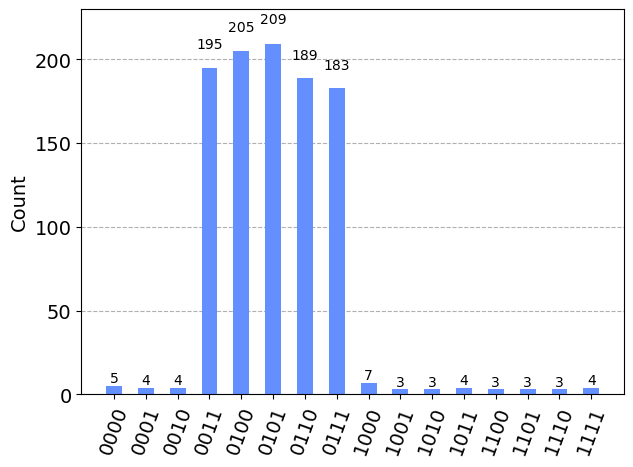

In [51]:
# 执行量子电路
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)

# 绘制直方图
plot_histogram(counts)

## 5 quibits

In [52]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

def create_oracle(target, n, delta):
    # 创建一个空的量子电路
    oracle_qc = QuantumCircuit(n)
    
    # 标记在目标值和差值范围内的所有值
    for d in range(-delta, delta + 1):
        value = (target + d) % (2**n)
        value_bin = format(value, '0' + str(n) + 'b')
        for qubit, bit in enumerate(reversed(value_bin)):  # 反转二进制字符串以匹配Qiskit的顺序
            if bit == '0':
                oracle_qc.x(qubit)
        oracle_qc.h(n-1)
        oracle_qc.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
        oracle_qc.h(n-1)
        for qubit, bit in enumerate(reversed(value_bin)):
            if bit == '0':
                oracle_qc.x(qubit)
    
    # 将电路转换为门
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

def grover_iteration(circuit, oracle, n):
    circuit.append(oracle, range(n))
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))
    return circuit

# 设置量子位数量和目标值
n = 5  # 量子位数量增加到4
target = 5  # 目标值（二进制为'0101'）
delta = 1  # 差值范围

# 初始化量子电路
qc = QuantumCircuit(n, n)

# 创建均匀叠加状态
qc.h(range(n))

# 创建oracle
oracle = create_oracle(target, n, delta)

# 执行Grover迭代
qc = grover_iteration(qc, oracle, n)

# 测量所有量子位
qc.measure(range(n), range(n))

qc.draw()

┌───┐┌─────────┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐            
q_0: ┤ H ├┤0        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├────────────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐         
q_1: ┤ H ├┤1        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├─────────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤      ║ └╥┘┌─┐      
q_2: ┤ H ├┤2 Oracle ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├──────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤      ║  ║ └╥┘┌─┐   
q_3: ┤ H ├┤3        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫──╫─┤M├───
     ├───┤│         │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├┤4        ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫──╫─┤M├
     └───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║  ║ └╥┘
c: 5/════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                         0  1  2  3  4

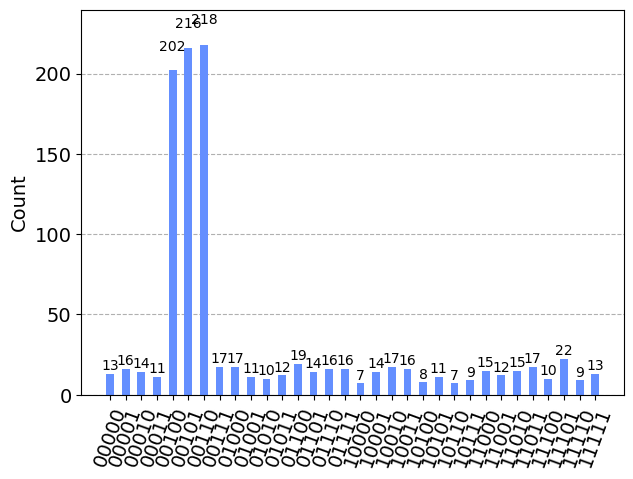

In [53]:
# 执行量子电路
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)

# 绘制直方图
plot_histogram(counts)


5 qubits 2

In [54]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

def create_oracle(target, n, delta):
    # 创建一个空的量子电路
    oracle_qc = QuantumCircuit(n)
    
    # 标记在目标值和差值范围内的所有值
    for d in range(-delta, delta + 1):
        value = (target + d) % (2**n)
        value_bin = format(value, '0' + str(n) + 'b')
        for qubit, bit in enumerate(reversed(value_bin)):  # 反转二进制字符串以匹配Qiskit的顺序
            if bit == '0':
                oracle_qc.x(qubit)
        oracle_qc.h(n-1)
        oracle_qc.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
        oracle_qc.h(n-1)
        for qubit, bit in enumerate(reversed(value_bin)):
            if bit == '0':
                oracle_qc.x(qubit)
    
    # 将电路转换为门
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

def grover_iteration(circuit, oracle, n):
    circuit.append(oracle, range(n))
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mct(list(range(n-1)), n-1)  # 多控制Toffoli门
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))
    return circuit

# 设置量子位数量和目标值
n = 5  # 量子位数量增加到4
target = 5  # 目标值（二进制为'0101'）
delta = 2  # 差值范围

# 初始化量子电路
qc = QuantumCircuit(n, n)

# 创建均匀叠加状态
qc.h(range(n))

# 创建oracle
oracle = create_oracle(target, n, delta)


In [55]:

# 执行Grover迭代
qc = grover_iteration(qc, oracle, n)

# 测量所有量子位
qc.measure(range(n), range(n))

qc.draw()

┌───┐┌─────────┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐            
q_0: ┤ H ├┤0        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├────────────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐         
q_1: ┤ H ├┤1        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├─────────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤      ║ └╥┘┌─┐      
q_2: ┤ H ├┤2 Oracle ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├──────
     ├───┤│         │├───┤├───┤       │  ├───┤├───┤      ║  ║ └╥┘┌─┐   
q_3: ┤ H ├┤3        ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫──╫─┤M├───
     ├───┤│         │├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├┤4        ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫──╫─┤M├
     └───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║  ║ └╥┘
c: 5/════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                         0  1  2  3  4

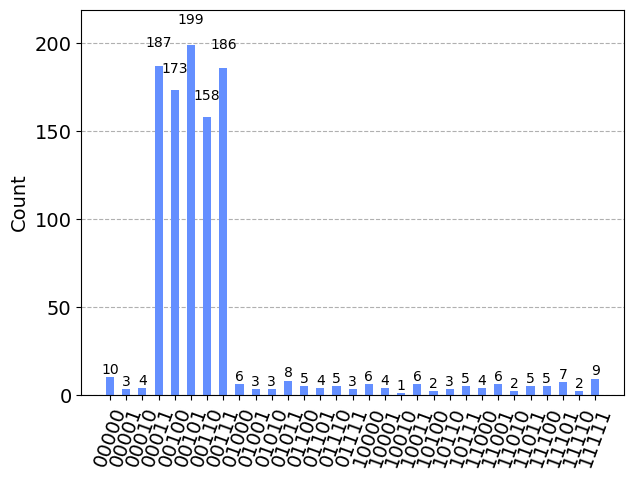

In [56]:
# 执行量子电路
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)

# 绘制直方图
plot_histogram(counts)